In [124]:
import json
import numpy as np
import glob
import geopandas as gpd
import matplotlib.pyplot as plt

In [125]:
# Reading the ground truth labels

# df_true = gpd.read_file("B:/Masters/Thesis/Calculating the matrices/Side of the road annotations/Sides_of_the_road_compare.geojson", crs='EPSG:25833')
df_true = gpd.read_file("B:/Masters/Thesis/Calculating the matrices/RGL/Ground_truth.geojson", crs='EPSG:25833')

# Reading the predicted labels

# df_predicted = gpd.read_file("B:/Masters/Thesis/Calculating the matrices/Side of the road annotations/Predictions_cropped.geojson", crs='EPSG:25833')
df_predicted = gpd.read_file("B:/Masters/Thesis/Calculating the matrices/Special cases/RGN/Predictions_true.geojson", crs='EPSG:25833')

In [126]:
# Adding a 0.5m buffer to both dataframes

df_true.geometry = df_true.geometry.buffer(0.5)
df_predicted.geometry = df_predicted.geometry.buffer(0.5)

In [127]:
# Dissolving geometries to avoid overlap areas

df_predicted_diss = df_predicted.dissolve()
df_true_diss = df_true.dissolve()


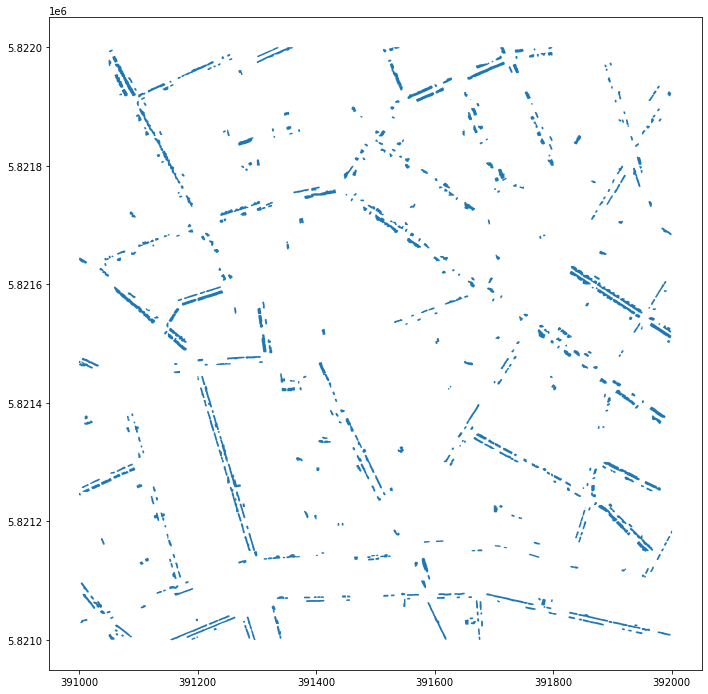

In [128]:
df_predicted_diss.plot(figsize=(12,12))

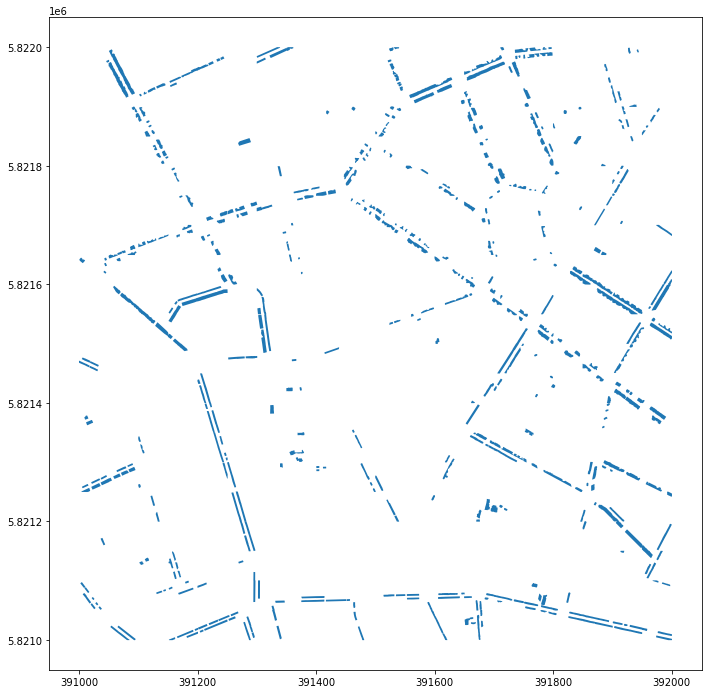

In [129]:
df_true_diss.plot(figsize=(12,12))

In [130]:
intersection = df_true_diss.intersection(df_predicted_diss, align=True)

In [131]:
type(df_true_diss)

geopandas.geodataframe.GeoDataFrame

In [132]:
TP = intersection.area
TP_FP = df_predicted_diss.area

In [133]:
# Precision
Precision = TP/TP_FP
Precision

0    0.672901
dtype: float64

In [134]:
union = df_true_diss.union(df_predicted_diss)

In [135]:
union.area

0    44081.861641
dtype: float64

In [136]:
TN = 1000*1000 - union.area

In [137]:
FN = union.area - df_predicted_diss.area

In [138]:
# Recall
Recall = TP/(TP+FN)
Recall

0    0.618787
dtype: float64

In [139]:
# Accuracy
Accuracy = (TP+TN)/(1000*1000)
Accuracy

0    0.976888
dtype: float64

In [140]:
# F1
F1 = (2*Recall*Precision)/(Recall+Precision)
F1


0    0.644711
dtype: float64

#

Precision values

For with trees: 0.306356 \
For without trees:  0.49294\
For RGL:  0.59646\
For RGN: 0.6391\
For RGN with flase positive removed: 0.672901\
For Sides of the road: 0.70863\
Sides of the road + RGN: 0.709657

Recall values

For with trees:  0.579603\
For without trees: 0.778483 \
For RGL: 0.560408 \
For RGN: 0.643152\
For RGN with flase positive removed: 0.618787\
For Sides of the road: 0.415213\
Sides of the road + RGN: 

Accuracy values

For with trees: 0.941281\
For without trees: 0.965356\
For RGL: 0.972254 \
For RGN: 0.975599\
For RGN with flase positives removed: 0.976888\
For Sides of the road: 0.962624\
Sides of the road + RGN: 

F1 score

For with trees: 0.400842\
For without trees: 0.603647 \
For RGL:  0.577872\
For RGN: 0.64112\
For RGN with flase positive removed: 0.644711\
For Sides of the road: 0.46321\
Sides of the road + RGN: 